<a href="https://colab.research.google.com/github/uzair011/Advance-python/blob/main/pandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
%matplotlib inline
# pd.__version__ 1.3.5

# OUTCOMES

* datetime
* agg
* apply
* applymap
* select subsets of the dataframe using boolean selection.
* application of want operator 

In [2]:
# load the data 
url = "https://datascience.quantecon.org/assets/data/state_unemployment.csv"
unemp_raw = pd.read_csv(url, parse_dates= ["Date"])

In [3]:
unemp_raw

,Date,state,LaborForce,UnemploymentRate
0,2000-01-01,Alabama,2142945.0,4.7
1,2000-01-01,Alaska,319059.0,6.3
2,2000-01-01,Arizona,2499980.0,4.1
3,2000-01-01,Arkansas,1264619.0,4.4
4,2000-01-01,California,16680246.0,5.0
...,...,...,...,...
10795,2017-12-01,Virginia,4318483.0,3.6
10796,2017-12-01,Washington,3754871.0,4.7
10797,2017-12-01,West Virginia,781852.0,5.4
10798,2017-12-01,Wisconsin,3158257.0,3.2


In [4]:
unemp_raw.head()

,Date,state,LaborForce,UnemploymentRate
0,2000-01-01,Alabama,2142945.0,4.7
1,2000-01-01,Alaska,319059.0,6.3
2,2000-01-01,Arizona,2499980.0,4.1
3,2000-01-01,Arkansas,1264619.0,4.4
4,2000-01-01,California,16680246.0,5.0


In [13]:
# Re-arranging the database

unemp_all = (
    unemp_raw
    .reset_index()
    .pivot_table(index = "Date", columns = "state", values = "UnemploymentRate")
)
print(unemp_all.head())

state       Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
Date                                                                   
2000-01-01      4.7     6.3      4.1       4.4         5.0       2.8   
2000-02-01      4.7     6.3      4.1       4.3         5.0       2.8   
2000-03-01      4.6     6.3      4.0       4.3         5.0       2.7   
2000-04-01      4.6     6.3      4.0       4.3         5.1       2.7   
2000-05-01      4.5     6.3      4.0       4.2         5.1       2.7   

state       Connecticut  Delaware  Florida  Georgia  ...  South Dakota  \
Date                                                 ...                 
2000-01-01          2.8       3.5      3.7      3.7  ...           2.4   
2000-02-01          2.7       3.6      3.7      3.6  ...           2.4   
2000-03-01          2.6       3.6      3.7      3.6  ...           2.4   
2000-04-01          2.5       3.7      3.7      3.7  ...           2.4   
2000-05-01          2.4       3.7      3.7      3.7

In [8]:
# filtering...

states = ["Alaska", "California", "Florida", "New York", "Washington"]
selected_unemp = unemp_all[states]
print(selected_unemp.head())

state       Alaska  California  Florida  New York  Washington
Date                                                         
2000-01-01     6.3         5.0      3.7       4.7         4.9
2000-02-01     6.3         5.0      3.7       4.7         4.9
2000-03-01     6.3         5.0      3.7       4.6         5.0
2000-04-01     6.3         5.1      3.7       4.6         5.0
2000-05-01     6.3         5.1      3.7       4.6         5.1


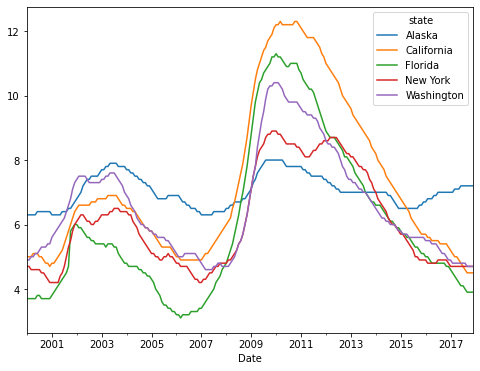

In [12]:
# plotting...

selected_unemp.plot(figsize=(8, 6))

# Dates in pandas

In [14]:
# (YYYY-MM-DD)

selected_unemp.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Date', length=216, freq=None)

In [16]:
# DateTimeIndex

selected_unemp.loc["01/01/2001", :]

state
Alaska        6.3
California    4.8
Florida       3.8
New York      4.2
Washington    5.6
Name: 2001-01-01 00:00:00, dtype: float64

In [19]:
selected_unemp.loc["01/01/2001": "01/01/2002", :]

state,Alaska,California,Florida,New York,Washington
Date,,,,,
2001-01-01,6.3,4.8,3.8,4.2,5.6
2001-02-01,6.3,4.8,3.9,4.2,5.7
2001-03-01,6.3,4.9,4.0,4.2,5.8
2001-04-01,6.3,5.0,4.1,4.2,5.9
2001-05-01,6.3,5.1,4.2,4.4,6.0
2001-06-01,6.4,5.2,4.3,4.5,6.1
2001-07-01,6.4,5.4,4.4,4.7,6.2
2001-08-01,6.4,5.6,4.5,5.0,6.4
2001-09-01,6.5,5.8,4.7,5.3,6.6
